<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_6_Clustering_Mohamad_Rayi_Dwi_Putra_1103213070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mohamad Rayi Dwi Putra
NIM : 1103213070
Dataset : Mall_Costumers.CSV
Task Lecture 6 Clustering
Dokumentasi Chat GPT :
1. https://chat.openai.com/share/cf0ad0f4-c8c3-40f5-ad26-a86fbad68f1a
2. https://chat.openai.com/share/791980b2-5a2b-4824-9670-2053fb9b13ed


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples
import numpy as np

**Mount Ke Drive**

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Baca File Dari Google Drive**

In [48]:
# Baca data dari file CSV menggunakan pandas
file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'
data = pd.read_csv(file_path)

**Menampilkan Data**

In [49]:
print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**Fitur Yang digunakan untuk Clustering**

In [50]:
# Pilih fitur yang akan digunakan untuk clustering
X = data.iloc[:, [2, 3, 4]].values  # Mengambil kolom Age, Annual Income, dan Spending Score

**Menggunakan Elbow Method untuk menentukan jumlah cluster yang optimal.**

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tentukan jumlah cluster yang optimal berdasarkan Elbow Method
optimal_clusters = 3  # Misalnya, dalam hal ini kita anggap 3 cluster sebagai jumlah optimal

# Buat model K-means dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Tambahkan kolom cluster dan hasil cluster ke dalam DataFrame
data['Cluster'] = y_kmeans

# Tampilkan hasil clustering
print("Hasil clustering setelah Elbow Method:")
print(data)


Hasil clustering setelah Elbow Method:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          1  
1          1  
2  

**Visualisasi Elbow Method**

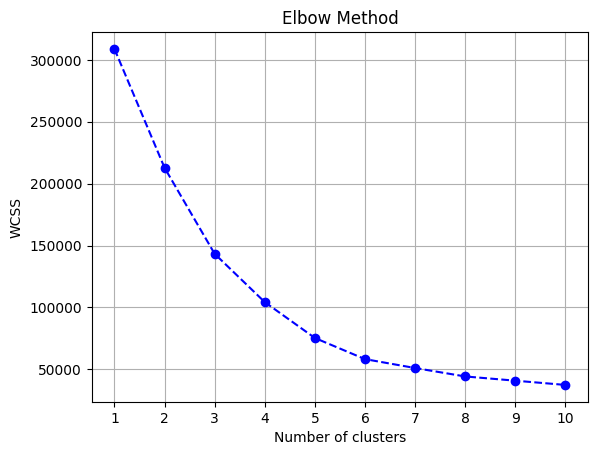

In [52]:
# Gunakan Elbow Method untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisasikan Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Setelah menampilkan Elbow Method, lanjutkan dengan pembuatan model K-means dan visualisasi hasil clustering seperti yang telah saya tunjukkan sebelumnya.


**Membuat model K-means dengan jumlah cluster yang dipilih**

In [53]:
# Buat model K-means dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Tambahkan kolom cluster ke dalam DataFrame
data['Cluster'] = y_kmeans

# Tampilkan hasil clustering
print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          1  
1          1  
2          1  
3          1  
4          1

**Visualisasi hasil clustering menggunakan scatter plot.**

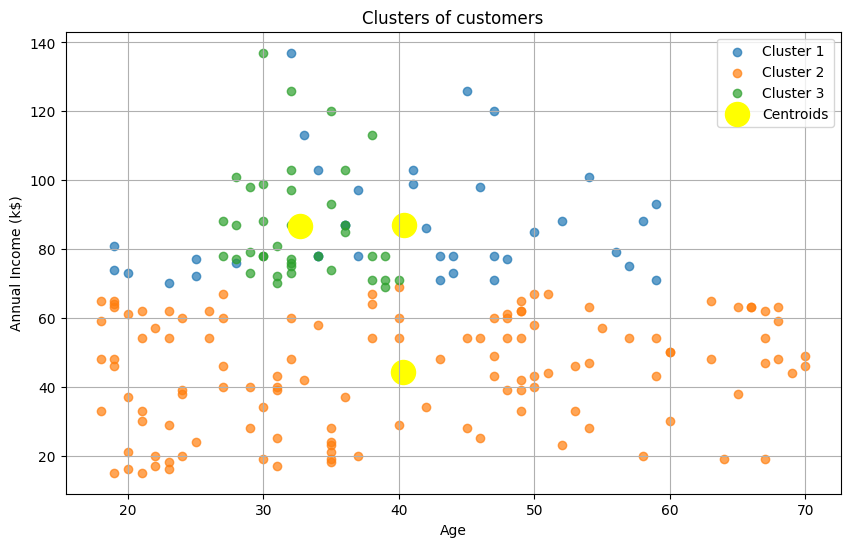

In [54]:
# Buat model K-means dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Tambahkan kolom cluster dan hasil cluster ke dalam DataFrame
data['Cluster'] = y_kmeans

# Visualisasikan hasil clustering menggunakan scatter plot
plt.figure(figsize=(10, 6))

# Plot setiap cluster dengan warna yang berbeda
for cluster in range(optimal_clusters):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], label=f'Cluster {cluster + 1}', alpha=0.7)

# Plot centroid dari setiap cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid(True)
plt.show()


**Menghitung dan mencetak beberapa metrik evaluasi clustering**

In [55]:
# Evaluasi clustering menggunakan beberapa metrik
silhouette_avg = silhouette_score(X, y_kmeans)  # Hitung Silhouette Score
db_index = davies_bouldin_score(X, y_kmeans)    # Hitung Davies-Bouldin Index
ch_index = calinski_harabasz_score(X, y_kmeans) # Hitung Calinski-Harabasz Index

# Print hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.3839349967742105
Davies-Bouldin Index: 0.8748062648492879
Calinski-Harabasz Index: 113.70507138642179


**Visualisasi Silhouette Plot yang menunjukkan silhouette coefficient untuk setiap sampel dalam setiap cluster.**

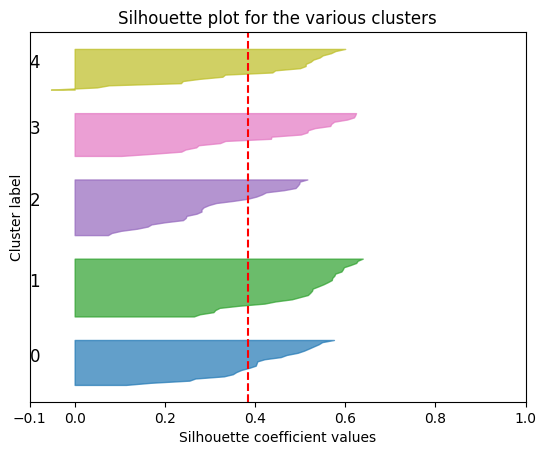

In [59]:
# Visualisasi Silhouette Plot
sample_silhouette_values = silhouette_samples(X, y_kmeans)  # Hitung nilai silhouette untuk setiap sampel
fig, ax = plt.subplots()

# Inisialisasi variabel penanda posisi bawah
y_lower = 10

# Iterasi melalui setiap cluster
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Pilih warna untuk cluster
    color = plt.cm.tab10(float(i) / 5)

    # Isi plot dengan warna cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Tandai nomor cluster
    ax.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i), color='k', fontsize=12)
    y_lower = y_upper + 10

# Atur judul dan label sumbu
ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# Tandai rata-rata silhouette score dengan garis putus-putus merah
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Sembunyikan label sumbu y
ax.set_yticks([])

# Atur tick label sumbu x
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Tampilkan plot
plt.show()


**Visualisasi Davies-Bouldin Plot**

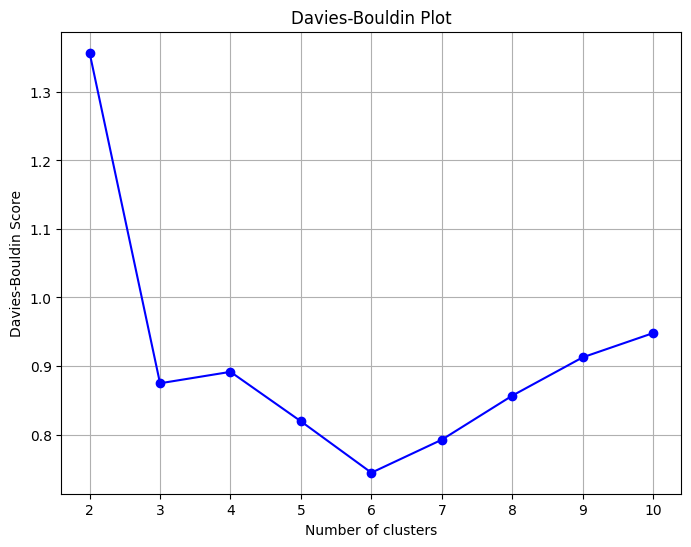

In [57]:
# Visualisasi Davies-Bouldin Plot
db_scores = []

# Iterasi melalui jumlah cluster dari 2 hingga 10
for i in range(2, 11):
    # Buat model K-means dengan jumlah cluster yang ditentukan
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Hitung Davies-Bouldin Index dan tambahkan ke dalam list
    db_scores.append(davies_bouldin_score(X, y_kmeans))

# Plot Davies-Bouldin Plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o', color='b', linestyle='-')
plt.title('Davies-Bouldin Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

**Evaluasi clustering menggunakan Calinski-Harabasz Index**

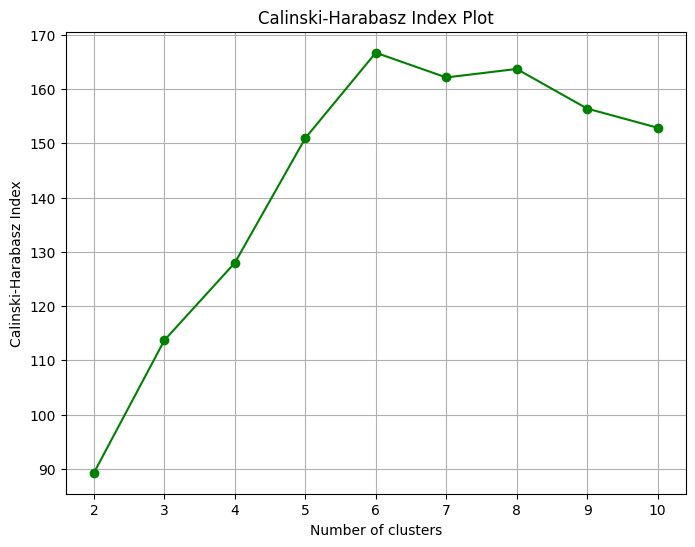

In [58]:
# Evaluasi clustering menggunakan Calinski-Harabasz Index
ch_scores = []

# Iterasi melalui jumlah cluster dari 2 hingga 10
for i in range(2, 11):
    # Buat model K-means dengan jumlah cluster yang ditentukan
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

# Hitung Calinski-Harabasz Index dan tambahkan ke dalam list
    ch_scores.append(calinski_harabasz_score(X, y_kmeans))

# Plot Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o', color='g', linestyle='-')
plt.title('Calinski-Harabasz Index Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()